In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('TSLA.csv')

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
dataset.shape

(2416, 7)

In [5]:
dataset.drop('Adj Close',axis = 1, inplace = True)
dataset.drop('Date',axis = 1, inplace = True)


In [6]:
dataset.head()

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


In [7]:
dataset.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2416 non-null   float64
 1   High    2416 non-null   float64
 2   Low     2416 non-null   float64
 3   Close   2416 non-null   float64
 4   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 94.5 KB


In [10]:
dataset.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


<AxesSubplot:>

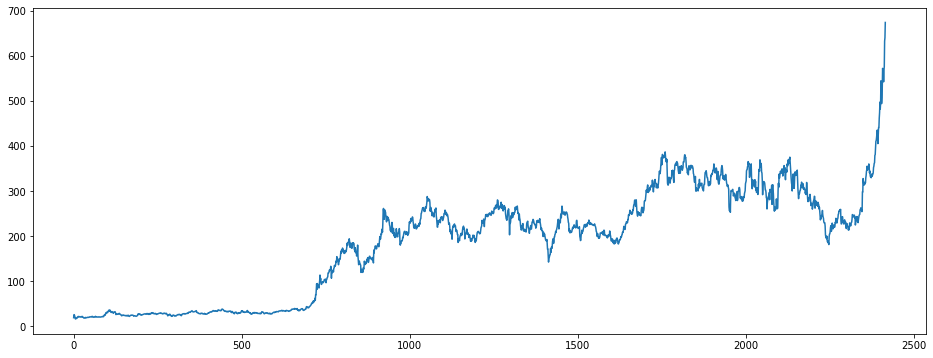

In [11]:
dataset['Open'].plot(figsize=(16,6))

In [12]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values
sc =  StandardScaler()
X1 = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split( X1, Y, test_size = 0.2, random_state = 0 )

In [13]:

from sklearn.linear_model import LinearRegression
X_Train , X_Test , y_Train , y_Test = train_test_split(X ,Y , random_state = 0)
print(X)
regressor = LinearRegression()
regressor.fit(X_Train,y_Train)
custom_data_prediction=regressor.predict(X_Test)

[[ 19.        25.        17.540001  23.889999]
 [ 25.790001  30.42      23.299999  23.83    ]
 [ 25.        25.92      20.27      21.959999]
 ...
 [632.419983 650.880005 618.       640.809998]
 [640.       653.       632.52002  650.570007]
 [673.690002 786.140015 673.52002  780.      ]]


# Linear Regression

In [14]:
class Linear_Regression():
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y ):
    self.m, self.n = X.shape 
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    Y_prediction = self.predict(self.X)
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction)/self.m  
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
  
  def predict(self, X):
    return X.dot(self.w) + self.b

         Actual   Predicted
0    214.020004  212.283167
1     28.580000   28.767654
2     24.879999   24.943301
3    348.619995  336.121338
4    200.899994  203.164383
..          ...         ...
479  192.699997  192.894362
480  363.299988  363.120997
481   27.490000   27.573598
482  186.580002  188.408598
483   32.200001   32.397084

[484 rows x 2 columns]
Mean Absolute Error: 1.2604825865214917
Mean Squared  Error: 4.401987987715675
Root Mean Squared Error: 2.0980915108058737


<AxesSubplot:>

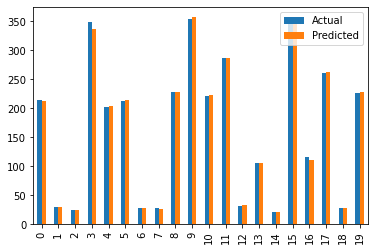

In [15]:
Linear_model = Linear_Regression(learning_rate = 0.01, no_of_iterations = 1000)
Linear_model.fit( X_train, Y_train )
Linear_Y_pred = Linear_model.predict( X_test )
Linear_df=pd.DataFrame({'Actual':Y_test,'Predicted':Linear_Y_pred})
print(Linear_df)
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Linear_Y_pred))
print('Mean Squared  Error:',metrics.mean_squared_error(Y_test,Linear_Y_pred))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(Y_test,Linear_Y_pred)))
graph=Linear_df.head(20)
graph.plot(kind='bar')

# Lasso Regression

In [16]:
class LassoRegression() :
    def __init__( self, learning_rate, iterations, l1_penality ) :
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penality = l1_penality
    def fit( self, X, Y ) :
        self.m, self.n = X.shape
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y
        for i in range( self.iterations ) :
            self.update_weights()
        return self
    def update_weights( self ) :
        Y_pred = self.predict( self.X )  
        dW = np.zeros( self.n )
        for j in range( self.n ) :
            if self.W[j] > 0 :
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) + self.l1_penality ) / self.m

            else :
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) - self.l1_penality ) / self.m

        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self
# Hypothetical function  h( x ) 
    def predict( self, X ) :
        return X.dot( self.W ) + self.b

         Actual   Predicted
0    214.020004  212.346722
1     28.580000   28.789360
2     24.879999   24.969353
3    348.619995  336.801723
4    200.899994  202.979873
..          ...         ...
479  192.699997  192.784202
480  363.299988  362.891586
481   27.490000   27.623724
482  186.580002  188.267238
483   32.200001   32.425411

[484 rows x 2 columns]
Mean Absolute Error: 1.138661977069429
Mean Squared  Error: 3.5576012910836377
Root Mean Squared Error: 1.8861604627082071


<AxesSubplot:>

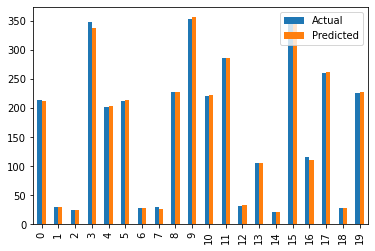

In [17]:
Lasso_model = LassoRegression( iterations = 1000, learning_rate = 0.1, l1_penality = 100)
Lasso_model.fit( X_train, Y_train )
Lasso_Y_pred = Lasso_model.predict( X_test )

Lasso_df=pd.DataFrame({'Actual':Y_test,'Predicted':Lasso_Y_pred})
print(Lasso_df)
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Lasso_Y_pred))
print('Mean Squared  Error:',metrics.mean_squared_error(Y_test,Lasso_Y_pred))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(Y_test,Lasso_Y_pred)))
graph=Lasso_df.head(20)
graph.plot(kind='bar')

In [18]:
class RidgeRegression() :
    def __init__( self, learning_rate, iterations, l2_penality ) :
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
                
    def fit( self, X, Y ) :      
        self.m, self.n = X.shape      
        self.W = np.zeros( self.n )
        self.b = 0        
        self.X = X        
        self.Y = Y
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self

    def update_weights( self ) :           
        Y_pred = self.predict( self.X )     
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) + ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m     
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self

    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

         Actual   Predicted
0    214.020004  212.000398
1     28.580000   30.825819
2     24.879999   27.050105
3    348.619995  334.235915
4    200.899994  203.008032
..          ...         ...
479  192.699997  192.866195
480  363.299988  360.928445
481   27.490000   29.645737
482  186.580002  188.438507
483   32.200001   34.408693

[484 rows x 2 columns]
Mean Absolute Error: 1.8194856269015536
Mean Squared  Error: 6.828898858846586
Root Mean Squared Error: 2.6132161906062397


<AxesSubplot:>

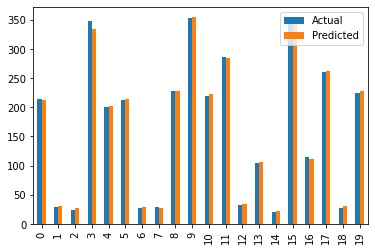

In [19]:
Ridge_model = RidgeRegression( iterations = 1000, learning_rate = 0.01, l2_penality = 100)
Ridge_model.fit( X_train, Y_train )
Ridge = Ridge_model.predict( X_test )

Lasso_df=pd.DataFrame({'Actual':Y_test,'Predicted':Ridge})
print(Lasso_df)
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Ridge))
print('Mean Squared  Error:',metrics.mean_squared_error(Y_test,Ridge))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(Y_test,Ridge)))
graph=Lasso_df.head(20)
graph.plot(kind='bar')

# Real Time Closing Price Prediction of stock

In [20]:
open = float(input("Enter the opening price of stock: "))
low = float(input("Enter the lowest price of stock: "))
high = float(input("Enter the highest price of stock: "))
volume = float(input("Enter the volume of stock: "))

custom_data=np.array([[open,low,high,volume]])
custom_data_prediction=regressor.predict(custom_data)
print("The stock will close at\n ",custom_data_prediction,"dollars")

ValueError: could not convert string to float: ''